## Intial scammer graph

1. This is a bank customer graph. Each node represents a customer.
2. Here the edges between each customer can be a interaction (chat, email,add benificary, calls, transfer of money) 
3. Here node 1,2,3,4 has been identified as scammer nodes by before. But node 0 is not identified as neither scammer or good node.  
**The clique technique helps to classify this node 0 as either scammer or good node. It also helps to identify scam rings thereby to identify common attributes amongst each of these scammer customers. We can create precautionary steps on this identified attributes so that the bank can weed out scammers early on**

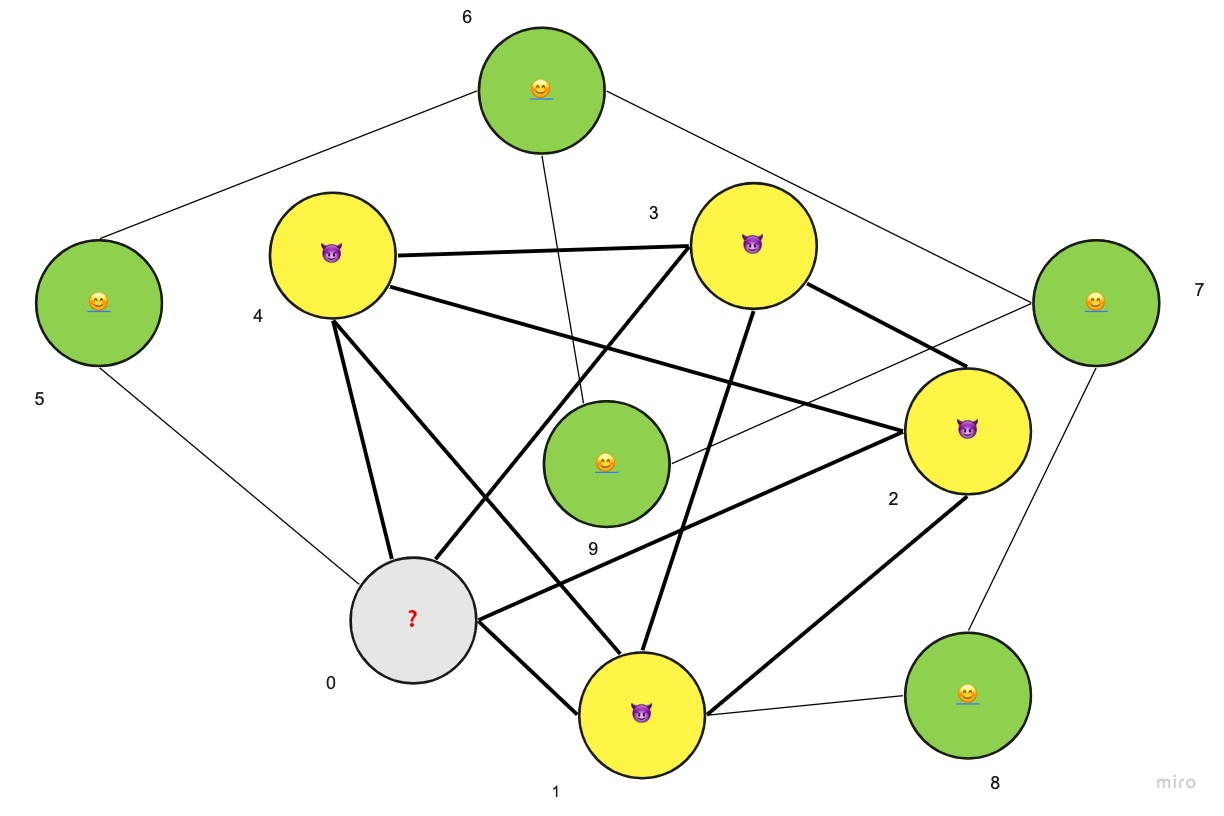

## Construct the scammer graph

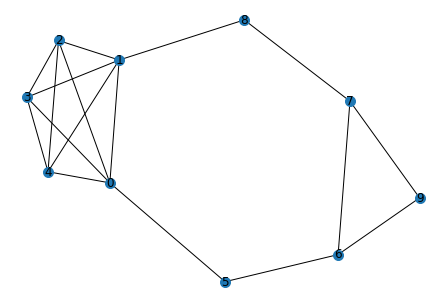

In [1]:
import networkx as nx
G = nx.empty_graph()

intial_scammer_nodes = set([1,2,3,4])
G.add_node(0, attr={"scammer": "Unknown"})
G.add_node(1, attr={"scammer": "Yes"})
G.add_node(2, attr={"scammer": "Yes"})
G.add_node(3, attr={"scammer": "Yes"})
G.add_node(4, attr={"scammer": "Yes"})
G.add_edges_from([(0,1), (0,2), (0,3), (0,4)])
G.add_edges_from([(1,0), (1,2), (1,3), (1,4)])
G.add_edges_from([(2,0), (2,1), (2,2), (2,3)])
G.add_edges_from([(3,0), (3,1), (3,2), (3,4)])
G.add_edges_from([(4,0), (4,1), (4,2), (4,3)])



G.add_node(5, attr={"scammer": "No"})
G.add_node(6, attr={"scammer": "No"})
G.add_node(7, attr={"scammer": "No"})
G.add_node(8, attr={"scammer": "No"})
G.add_node(9, attr={"scammer": "No"})
G.add_edges_from([(5,6), (5,0)])
G.add_edges_from([(6,9), (6,7)])
G.add_edges_from([(7,6), (7,9), (7,8)])
G.add_edges_from([(8,1)])


nx.draw(G, with_labels=True, node_size=100)

## Find scammer nodes (Clique nodes)

In [2]:
from qiskit_optimization.applications import Clique
clique = Clique(G)
qp = clique.to_quadratic_program()

In [3]:
from qiskit_optimization.algorithms.goemans_williamson_optimizer import (
    GoemansWilliamsonOptimizer,
)
from qiskit_optimization.algorithms.warm_start_qaoa_optimizer import (
    MeanAggregator,
    WarmStartQAOAOptimizer,
)
from qiskit_optimization.algorithms import GroverOptimizer, WarmStartQAOAOptimizer
from qiskit import BasicAer
from qiskit.algorithms import QAOA


backend = BasicAer.get_backend("statevector_simulator")
presolver = GoemansWilliamsonOptimizer(num_cuts=2)
qaoa = QAOA(quantum_instance=backend, reps=5)
aggregator = MeanAggregator()
optimizer = WarmStartQAOAOptimizer(
            pre_solver=presolver,
            relax_for_pre_solver=False,
            qaoa=qaoa,
            epsilon=0.25,
            num_initial_solutions=1,
            aggregator=aggregator,
        )
result = optimizer.solve(qp)

/Users/wing/miniconda3/envs/dev/lib/python3.8/site-packages/qiskit_optimization/algorithms/optimization_algorithm.py:138: UserWarning: The sum of probability of samples is not close to 1: f{sum_prob}
  warn("The sum of probability of samples is not close to 1: f{sum_prob}")


In [4]:
predicted_scammer_nodes= set(clique.interpret(result))
print(f"The clique nodes identified which has high probability of being scammer: {predicted_scammer_nodes}")
print(f"Additional found scammer node: {predicted_scammer_nodes - intial_scammer_nodes}")

The clique nodes identified which has high probability of being scammer: {0, 1, 2, 3, 4}
Additional found scammer node: {0}


## Visualise the scammer nodes

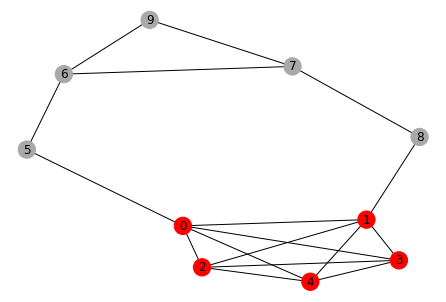

In [5]:
clique._draw_result(result)

Scammer customers are marked in red. Good customers are marked in grey
